<font size='10'><h1 align="center"><font color='blue'>iPy oxDNA Examples</font></h1>

<center>
<img src="oxDNA.png">
</center>

<font size='10'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Duplex Melting</font></h2> 

In [1]:
from umbrella_sampling import ComUmbrellaSampling, MeltingUmbrellaSampling
from oxdna_simulation import SimulationManager, Simulation, Observable
from wham_analysis import collect_coms
import os
import matplotlib.pyplot as plt
from vmmc import *
from collections import Counter
from parameter_search import * 
import numpy as np
from skopt import Optimizer
from skopt.space import Categorical, Space
from scipy.special import logsumexp
from copy import deepcopy
from numba import jit
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
wham_dir = os.path.abspath('/scratch/matthew/ipy_oxDNA/src/wham/wham')
n_bins = '200'
tol = '1e-12'
n_boot = '0'
com_list = '8,9,10,11,12,13,14,15'
ref_list = '0,1,2,3,4,5,6,7'
xmin = 0
xmax = 15
n_windows = 50
starting_r0 = 1
steps = 1e6
stiff=5
for us in us_list:
    us.wham_run(wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

NameError: name 'us_list' is not defined

In [3]:
path = os.path.abspath('/scratch/matthew/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/')

system_name = 'multi_system_runs'

k_value_list = ['5_normal_2']#, '5_unique_1']
# k_value_list = ['5']

systems = [f'duplex_52_{stiff}' for stiff in k_value_list]

file_dirs = [f'{path}/{system_name}' for _ in range(len(systems))]


com_list = '8,9,10,11,12,13,14,15'
ref_list = '0,1,2,3,4,5,6,7'
xmin = 0
xmax = 15
n_windows = 50
starting_r0 = 1
steps = 1e6



pre_equlibration_parameters_list = [{'backend':'CPU','steps':'1e6','print_energy_every': '100',
                           'print_conf_interval':'4e7', "CUDA_list": "no",
                           'use_edge': 'false', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                           'T':f'52C'} for _ in k_value_list]

equlibration_parameters_list = [{'backend':'CPU','steps':'1e7','print_energy_every': '100',
                           'print_conf_interval':'4e7', "CUDA_list": "no",
                           'use_edge': 'false', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                           'T':f'52C'} for _ in k_value_list]

production_parameters_list = [{'backend':'CPU','steps':'1e9','print_energy_every': '100',
                        'print_conf_interval':'1e8', "CUDA_list": "no",
                        'use_edge': 'false', 'refresh_vel': '1',
                        'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                        'T':f'52C'} for temp in k_value_list]

us_list = [MeltingUmbrellaSampling(file_dir, sys, clean_build='force') for file_dir, sys in zip(file_dirs,systems)]

simulation_manager = SimulationManager()

In [157]:
for us, pre_equlibration_parameters, stiff in zip(us_list, pre_equlibration_parameters_list, k_value_list):
    print(us.system)
    us.build_pre_equlibration_runs(simulation_manager, n_windows, com_list, ref_list,
                               stiff, xmin, xmax, pre_equlibration_parameters, starting_r0, steps,
                               print_every=100, observable=True, protein=None,
                               force_file=None, continue_run=False)

duplex_52_5_normal_2


In [158]:
simulation_manager.worker_manager(cpu_run=True, gpu_mem_block=False)

Running: 0
Running: 1
Running: 2
Running: 3
Running: 4
Running: 5
Running: 6
Running: 7
Running: 8
Running: 9
Running: 10
Running: 11
Running: 12
Running: 13
Running: 14
Run time: 24.13089661113918
Finished: 3


INFO: Lists updated 3264 times (every ~306.372549 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.430 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0521 MB/s



Running: 15
Run time: 29.692927308380604
Finished: 9


INFO: Lists updated 3457 times (every ~289.268152 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.439 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0424 MB/s



Running: 16
Run time: 31.259354733861983
Finished: 14


INFO: Lists updated 3628 times (every ~275.633958 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.411 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0404 MB/s



Running: 17
Run time: 32.61981603316963
Finished: 13


INFO: Lists updated 3211 times (every ~311.429461 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.396 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0387 MB/s



Running: 18
Run time: 36.179781711660326
Finished: 7


INFO: Lists updated 3049 times (every ~327.976386 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.420 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0347 MB/s



Running: 19Run time: 35.66035820823163

Finished: 11Run time: 36.205167673528194

Finished: 8


INFO: Lists updated 3053 times (every ~327.546675 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.441 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0353 MB/s

INFO: Lists updated 3457 times (every ~289.268152 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.443 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0348 MB/s



Run time: 35.97109388001263
Finished: 10


INFO: Lists updated 3193 times (every ~313.185092 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.423 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0351 MB/s



Run time: 37.729756854474545
Finished: 0


INFO: Lists updated 2146 times (every ~465.983225 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.432 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0332 MB/s



Running: 20
Running: 21
Running: 22
Running: 23
Run time: 38.23263349663466
Finished: 6


INFO: Lists updated 3362 times (every ~297.441999 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.433 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0329 MB/s



Running: 24
Run time: 42.130449446849525
Finished: 1


INFO: Lists updated 3022 times (every ~330.906684 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.410 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0297 MB/s



Run time: 41.52648383099586
Finished: 5
Running: 25


INFO: Lists updated 2502 times (every ~399.680256 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.473 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0302 MB/s



Running: 26
Run time: 42.64149072300643
Finished: 2


INFO: Lists updated 3021 times (every ~331.016220 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.424 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0294 MB/s



Running: 27
Run time: 42.711464673280716
Finished: 12


INFO: Lists updated 3286 times (every ~304.321363 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.465 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0389 MB/s



Running: 28
Run time: 49.61239745467901
Finished: 4


INFO: Lists updated 3266 times (every ~306.184936 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.438 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0344 MB/s



Running: 29
Run time: 30.407174120657146
Finished: 15


INFO: Lists updated 3326 times (every ~300.661455 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.462 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0416 MB/s



Running: 30
Run time: 23.179787039756775
Finished: 18


INFO: Lists updated 3462 times (every ~288.850376 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.429 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0553 MB/s



Running: 31
Run time: 29.81647408567369
Finished: 16


INFO: Lists updated 3139 times (every ~318.572794 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.428 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0426 MB/s



Running: 32
Run time: 25.542255285196006
Finished: 21


INFO: Lists updated 3944 times (every ~253.549696 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.419 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0498 MB/s



Running: 33
Run time: 26.09913886152208
Finished: 24


INFO: Lists updated 3637 times (every ~274.951883 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.387 KB written to files
	605.529 KB written to stdout/stderr
	For a total of    0.049 MB/s



Running: 34
Run time: 28.590425453148782
Finished: 19


INFO: Lists updated 3629 times (every ~275.558005 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.434 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0443 MB/s



Run time: 27.95459353365004
Finished: 23
Running: 35


INFO: Lists updated 3332 times (every ~300.120048 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.413 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0462 MB/s



Running: 36
Run time: 28.549551288597286
Finished: 22


INFO: Lists updated 3596 times (every ~278.086763 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.420 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0446 MB/s



Running: 37
Run time: 33.97844955790788
Finished: 17


INFO: Lists updated 3314 times (every ~301.750151 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.454 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0427 MB/s



Running: 38
Run time: 25.07947384007275
Finished: 27


INFO: Lists updated 3658 times (every ~273.373428 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.438 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0545 MB/s



Running: 39
Run time: 27.051711101084948
Finished: 26


INFO: Lists updated 3663 times (every ~273.000273 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.427 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0469 MB/s



Running: 40
Run time: 33.207431331276894
Finished: 20


INFO: Lists updated 3574 times (every ~279.798545 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.441 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0428 MB/s



Run time: 28.675865781493485
Finished: 25
Running: 41


INFO: Lists updated 3304 times (every ~302.663438 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.420 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0459 MB/s



Running: 42
Run time: 26.963113863021135
Finished: 28


INFO: Lists updated 3460 times (every ~289.017341 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.431 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0473 MB/s



Running: 43
Run time: 28.001120016910136
Finished: 29


INFO: Lists updated 3322 times (every ~301.023480 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.431 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0459 MB/s



Running: 44
Run time: 24.75589871406555
Finished: 30


INFO: Lists updated 3562 times (every ~280.741157 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.414 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0515 MB/s



Running: 45
Run time: 21.48619276098907
Finished: 33


INFO: Lists updated 3546 times (every ~282.007896 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.432 KB written to files
	605.529 KB written to stdout/stderr
	For a total of     0.06 MB/s



Running: 46
Run time: 27.17365303914994
Finished: 31


INFO: Lists updated 3806 times (every ~262.743037 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.408 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0509 MB/s



Running: 47
Run time: 26.446246313862503
Finished: 32


INFO: Lists updated 3422 times (every ~292.226768 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.438 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0484 MB/s



Running: 48
Run time: 24.12202319689095
Finished: 35


INFO: Lists updated 3677 times (every ~271.960838 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.431 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0532 MB/s



Running: 49
Run time: 26.194106763228774
Finished: 34
Run time: 25.60568367689848
Run time: 19.951221587136388
Finished: 36Finished: 43



INFO: Lists updated 3564 times (every ~280.583614 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.443 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0485 MB/s

INFO: Lists updated 3858 times (every ~259.201659 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.408 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0497 MB/s

INFO: Lists updated 4234 times (every ~236.183278 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.452 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0642 MB/s



Run time: 25.93443706445396
Finished: 38


INFO: Lists updated 3624 times (every ~275.938190 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.431 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0491 MB/s



Run time: 27.70409290958196
Finished: 37
Run time: 24.64052627235651
Finished: 40


INFO: Lists updated 3489 times (every ~286.615076 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.433 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0509 MB/s

INFO: Lists updated 3880 times (every ~257.731959 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.453 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0525 MB/s



Run time: 23.375722877681255
Finished: 42


INFO: Lists updated 3627 times (every ~275.709953 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.459 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0544 MB/s



Run time: 24.132989450357854
Finished: 41


INFO: Lists updated 3767 times (every ~265.463233 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.433 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0532 MB/s



Run time: 27.87168855126947
Finished: 39


INFO: Lists updated 3501 times (every ~285.632676 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.425 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0505 MB/s



Run time: 20.45567261520773
Finished: 44


INFO: Lists updated 3609 times (every ~277.085065 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.431 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0622 MB/s



Run time: 20.112902412191033
Finished: 45


INFO: Lists updated 3894 times (every ~256.805342 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.433 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0707 MB/s



Run time: 16.29015580844134
Finished: 47


INFO: Lists updated 3412 times (every ~293.083236 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.429 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0781 MB/s



Run time: 17.524379902519286
Finished: 46


INFO: Lists updated 3713 times (every ~269.323997 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.436 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0727 MB/s



Run time: 13.652780063450336
Finished: 49


INFO: Lists updated 3576 times (every ~279.642058 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.445 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0934 MB/s



Run time: 16.617640148848295
Finished: 48
All queued simulations finished in: 104.81534037273377


INFO: Lists updated 3843 times (every ~260.213375 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	629.455 KB written to files
	605.529 KB written to stdout/stderr
	For a total of   0.0765 MB/s



In [159]:
for us, equlibration_parameters, stiff in zip(us_list, equlibration_parameters_list, k_value_list):
    print(us.system)
    us.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list,
                               stiff, xmin, xmax, equlibration_parameters,
                               print_every=100, observable=True, protein=None,
                               force_file=None, continue_run=False)

duplex_52_5_normal_2


In [ ]:
for us in us_list[1:]:
    us.modify_topology_for_unique_pairing()

In [160]:
simulation_manager.worker_manager(cpu_run=True, gpu_mem_block=False)

Running: 0
Running: 1
Running: 2
Running: 3
Running: 4
Running: 5
Running: 6
Running: 7
Running: 8
Running: 9
Running: 10
Running: 11
Running: 12
Running: 13
Running: 14
Run time: 125.7891901563853
Finished: 12


INFO: Lists updated 39100 times (every ~255.754476 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of     0.18 MB/s



Running: 15
Run time: 233.50946899037808
Finished: 11


INFO: Lists updated 39217 times (every ~254.991458 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of   0.0971 MB/s



Running: 16
Run time: 239.57941404543817
Finished: 10


INFO: Lists updated 40209 times (every ~248.700540 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of   0.0946 MB/s



Running: 17
Run time: 249.35161003936082
Finished: 8


INFO: Lists updated 40069 times (every ~249.569493 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of   0.0905 MB/s



Running: 18
Run time: 274.26532899588346
Finished: 9


INFO: Lists updated 38608 times (every ~259.013676 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of   0.0847 MB/s



Running: 19
Run time: 280.0293990597129
Finished: 5


INFO: Lists updated 36186 times (every ~276.349970 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of   0.0795 MB/s



Running: 20
Run time: 280.7483584759757
Finished: 6


INFO: Lists updated 39496 times (every ~253.190196 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of   0.0799 MB/s



Running: 21
Run time: 297.7122676447034
Finished: 4


INFO: Lists updated 37218 times (every ~268.687194 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of   0.0749 MB/s



Running: 22
Run time: 298.54244378302246
Finished: 13


INFO: Lists updated 38841 times (every ~257.459901 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.104 MB/s



Running: 23
Run time: 300.0442693158984
Finished: 14


INFO: Lists updated 40205 times (every ~248.725283 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.107 MB/s



Running: 24
Run time: 194.15834632143378
Finished: 15


INFO: Lists updated 37668 times (every ~265.477328 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.117 MB/s



Running: 25
Run time: 391.60016842838377
Finished: 1


INFO: Lists updated 24212 times (every ~413.018338 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of   0.0561 MB/s



Running: 26
Run time: 405.0290049929172
Finished: 7


INFO: Lists updated 39282 times (every ~254.569523 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of   0.0819 MB/s



Running: 27
Run time: 406.5578897744417
Finished: 2


INFO: Lists updated 30528 times (every ~327.568134 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of   0.0542 MB/s



Running: 28
Run time: 195.16225568857044
Finished: 16


INFO: Lists updated 38692 times (every ~258.451359 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.116 MB/s



Running: 29
Run time: 208.60308416374028
Finished: 17


INFO: Lists updated 39445 times (every ~253.517556 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.109 MB/s



Running: 30
Run time: 449.9919359963387
Finished: 3


INFO: Lists updated 33687 times (every ~296.850417 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of   0.0554 MB/s



Running: 31
Run time: 462.8062733206898
Finished: 0


INFO: Lists updated 20348 times (every ~491.448791 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of   0.0474 MB/s



Running: 32
Run time: 196.4480629907921
Finished: 19


INFO: Lists updated 39457 times (every ~253.440454 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.115 MB/s



Running: 33
Run time: 205.54949586465955
Finished: 20


INFO: Lists updated 38638 times (every ~258.812568 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of     0.11 MB/s



Running: 34
Run time: 185.9504624409601
Finished: 24


INFO: Lists updated 38092 times (every ~262.522314 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.122 MB/s



Running: 35
Run time: 208.61876222584397
Finished: 21


INFO: Lists updated 38013 times (every ~263.067898 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.108 MB/s



Running: 36
Run time: 203.88383812643588
Finished: 22


INFO: Lists updated 39090 times (every ~255.819903 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.111 MB/s



Running: 37
Run time: 216.50917198043317
Finished: 23


INFO: Lists updated 38688 times (every ~258.478081 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.109 MB/s



Running: 38
Run time: 267.46643088944256
Finished: 18


INFO: Lists updated 39213 times (every ~255.017469 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.109 MB/s



Running: 39
Run time: 210.225933262147
Finished: 25


INFO: Lists updated 39273 times (every ~254.627861 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.108 MB/s



Running: 40
Run time: 207.20855426136404
Finished: 26


INFO: Lists updated 39225 times (every ~254.939452 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.114 MB/s



Running: 41
Run time: 218.8623259011656
Finished: 28


INFO: Lists updated 39876 times (every ~250.777410 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of     0.12 MB/s



Running: 42
Run time: 223.09519999288023
Finished: 27


INFO: Lists updated 38624 times (every ~258.906379 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.115 MB/s



Running: 43
Run time: 202.40597930550575
Finished: 29


INFO: Lists updated 39088 times (every ~255.832992 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.116 MB/s



Running: 44
Run time: 192.31722339987755
Finished: 31


INFO: Lists updated 39418 times (every ~253.691207 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.118 MB/s



Running: 45
Run time: 211.20625956729054
Finished: 33


INFO: Lists updated 38055 times (every ~262.777559 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.107 MB/s



Running: 46
Run time: 226.249072836712
Finished: 32


INFO: Lists updated 38722 times (every ~258.251123 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.107 MB/s



Running: 47
Run time: 172.22011738922447
Finished: 39


INFO: Lists updated 38901 times (every ~257.062800 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.145 MB/s



Running: 48
Run time: 245.68985364865512
Finished: 30


INFO: Lists updated 39149 times (every ~255.434366 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.113 MB/s



Running: 49
Run time: 211.50611432641745
Finished: 34


INFO: Lists updated 38274 times (every ~261.273972 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.107 MB/s



Run time: 209.03597365133464
Finished: 36


INFO: Lists updated 38868 times (every ~257.281054 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.108 MB/s



Run time: 213.6616335567087
Finished: 35


INFO: Lists updated 39778 times (every ~251.395244 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.112 MB/s



Run time: 225.93087557144463
Finished: 37


INFO: Lists updated 39284 times (every ~254.556562 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of     0.11 MB/s



Run time: 201.97849515546113
Finished: 40


INFO: Lists updated 40737 times (every ~245.477085 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.112 MB/s



Run time: 230.26537686865777
Finished: 38


INFO: Lists updated 40332 times (every ~247.942081 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of     0.11 MB/s



Run time: 126.18850371614099
Finished: 44


INFO: Lists updated 39466 times (every ~253.382658 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.179 MB/s



Run time: 162.79035537783056
Finished: 41


INFO: Lists updated 39799 times (every ~251.262595 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.139 MB/s



Run time: 142.5481984745711
Finished: 45


INFO: Lists updated 39538 times (every ~252.921240 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.159 MB/s



Run time: 168.88612986449152
Finished: 42


INFO: Lists updated 39555 times (every ~252.812540 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.134 MB/s



Run time: 175.34608021564782
Finished: 43


INFO: Lists updated 39170 times (every ~255.297421 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.129 MB/s



Run time: 130.7663347236812
Finished: 47


INFO: Lists updated 39822 times (every ~251.117473 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.173 MB/s



Run time: 143.4092347631231
Finished: 49


INFO: Lists updated 38745 times (every ~258.097819 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.158 MB/s



Run time: 165.0152854155749
Finished: 46


INFO: Lists updated 39476 times (every ~253.318472 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.137 MB/s



Run time: 162.54467034433037
Finished: 48


INFO: Lists updated 38560 times (every ~259.336100 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 14.786 MB written to files
	  5.913 MB written to stdout/stderr
	For a total of    0.139 MB/s



All queued simulations finished in: 854.4724514028057


In [5]:
for us, production_parameters, stiff in zip(us_list, production_parameters_list, k_value_list):
    print(us.system)
    us.build_production_runs(simulation_manager, n_windows, com_list, ref_list,
                             stiff, xmin, xmax, production_parameters,
                             observable=True, print_every=100 ,protein=None,
                             force_file=None, continue_run=False)

duplex_52_5_normal_2


In [ ]:
simulation_manager.run(cpu_run=True, gpu_mem_block=False)

spawning


Running: 0


Running: 1
Running: 2
Running: 3
Running: 4
Running: 5
Running: 6
Running: 7
Running: 8
Running: 9
Running: 10
Running: 11
Running: 12
Running: 13
Running: 14
Running: 15
Running: 16
Running: 17
Running: 18
Running: 19
Running: 20
Running: 21
Running: 22
Running: 23
Running: 24
Running: 25
Running: 26
Running: 27
Running: 28
Running: 29
Running: 30
Running: 31
Running: 32
Running: 33
Running: 34
Running: 35
Running: 36
Running: 37
Running: 38
Running: 39
Running: 40
Running: 41
Running: 42
Running: 43
Running: 44
Running: 45
Running: 46
Running: 47
Running: 48
Running: 49


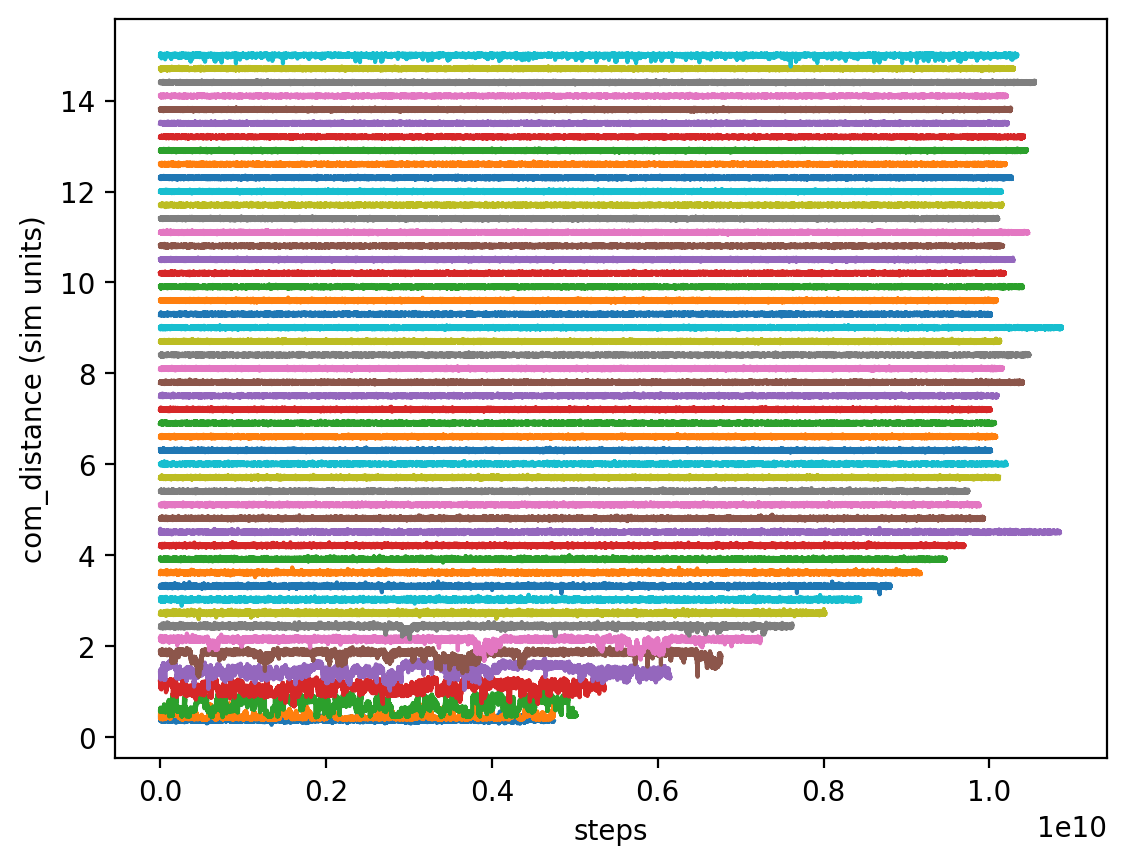

In [33]:
for us in us_list:
    us.com_distance_observable(com_list, ref_list)


for us in us_list:
    plt.figure(dpi=200)
    for idx in range(0,50,1):
        us.analysis.view_observable('prod', idx, observable=us.observables_list[0], sliding_window=100)
    # plt.legend([us.system], fontsize=7)

In [4]:
path = os.path.abspath('/scratch/matthew/ipy_oxDNA/ipy_oxdna_examples')
systems = ['duplex_melting']

file_dir_list = [f'{path}/{sys}' for sys in systems]
sim_dir_list = [f'{file_dir}/vmmc_melting_replicas/vmmc_melting_rep' for sys, file_dir in zip(systems, file_dir_list)]

n_replicas = 40
vmmc_replica_generator = VmmcReplicas()

vmmc_replica_generator.multisystem_replica(
    systems,
    n_replicas,
    file_dir_list,
    sim_dir_list
)
vmmc_sim_list = vmmc_replica_generator.sim_list
queue_of_simulations = vmmc_replica_generator.queue_of_sims

/home/matthew/.local/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/matthew/.local/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


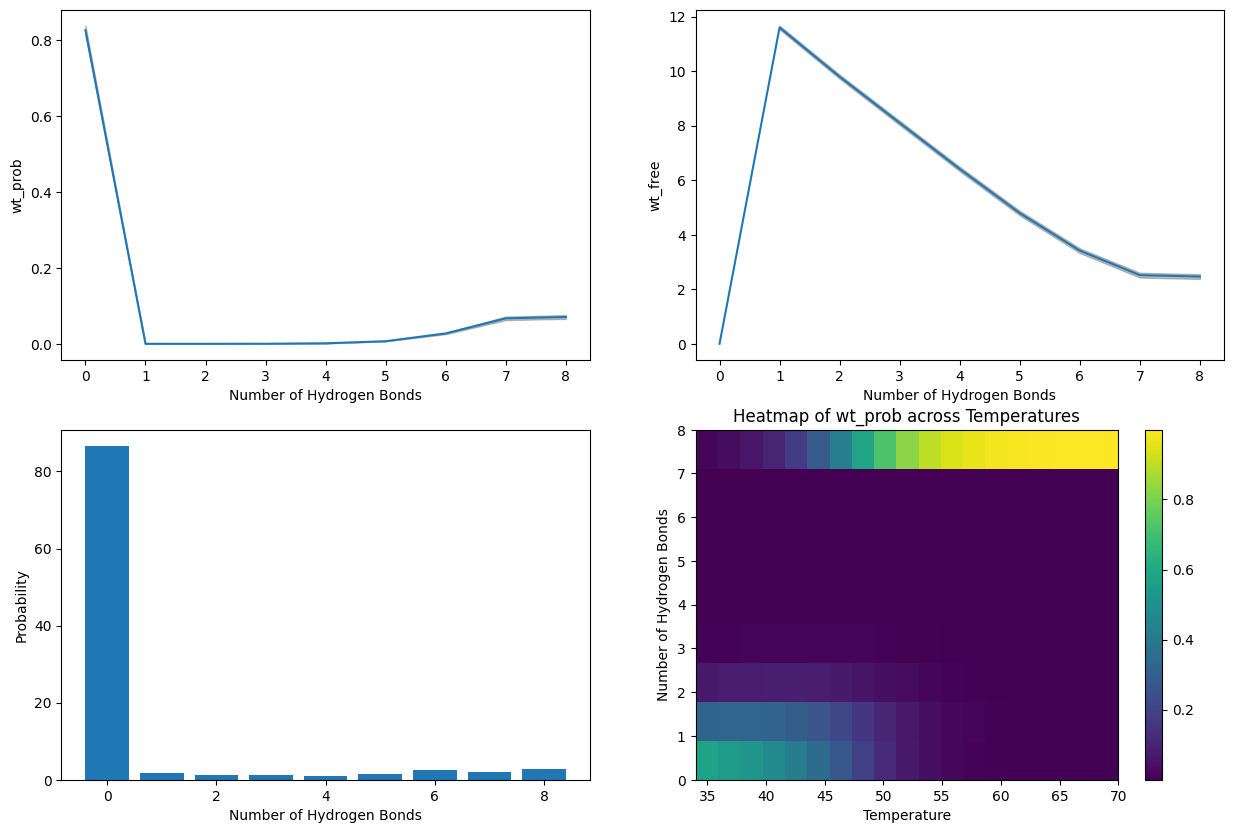

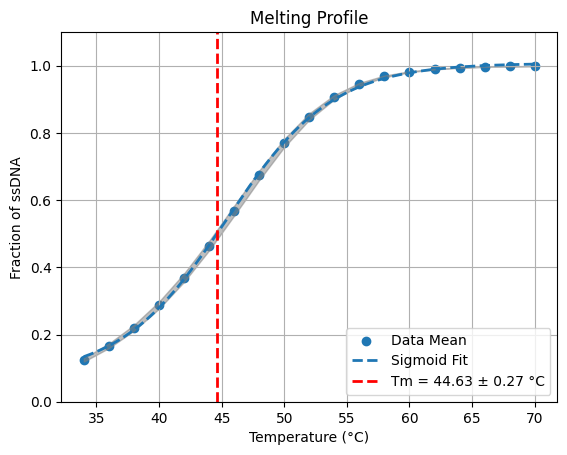

In [5]:
vmmc_replica_generator.statistical_analysis_and_plot()

No non-zero minimum value found.
No non-zero minimum value found.
No non-zero minimum value found.
No non-zero minimum value found.


(-0.1, 8.1)

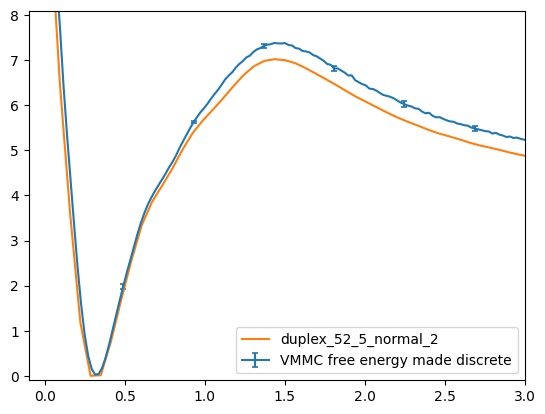

In [20]:
fig, ax = plt.subplots()

vmmc_replica_generator.plot_mean_free_energy_with_error_bars(num_bins=1000, errorevery=20,ax=ax)
for us in us_list:
    us.wham.plot_free_energy(ax = ax)
plt.legend()
plt.xlim(-0.1, 3)
plt.ylim(-0.1,8.1)

In [66]:
max_hb = 8
temp_range = np.array([30, 52, 70])   
us_list[0].temperature_interpolation(max_hb, temp_range, reread_files=False)

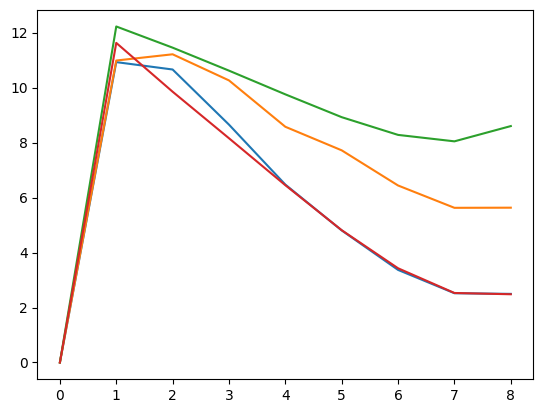

In [19]:
for free in us_list[0].free_energy_discrete[1:]:
    plt.plot(range(9), free - free[0])
    
# plt.plot(range(9), vmmc_replica_generator.sim_list[0].statistics['wt_occ_34.0C_free'] - vmmc_replica_generator.sim_list[0].statistics['wt_occ_34.0C_free'][0])

plt.plot(range(9), vmmc_replica_generator.sim_list[0].statistics['wt_occ_70.0C_free']- vmmc_replica_generator.sim_list[0].statistics['wt_occ_70.0C_free'][0])

plt.plot(range(9), vmmc_replica_generator.sim_list[0].statistics['wt_occ_52.0C_free']- vmmc_replica_generator.sim_list[0].statistics['wt_occ_52.0C_free'][0])

# plt.plot(range(9), vmmc_replica_generator.sim_list[0].statistics['wt_occ_34.0C_free'])

In [3]:
max_hb = 8
us_list[0].continuous_to_discrete_unbiasing(max_hb)

# Scale A_i with diffrent beta values and recompute temps

In [4]:
temp_range = np.array([30, 52, 70])   
n_bins = 200
free, F_i_temps, f_i_temps_over_time = us_list[0].wham_temperature_interpolation(temp_range, n_bins)

In [6]:
temp_range = np.array([30, 52, 70])   
min_length = min([len(inner_list) for inner_list in us_list[0].umbrella_bias])
umbrella_bias = np.array([inner_list[:min_length] for inner_list in us_list[0].umbrella_bias]).squeeze(-1)
potential_energy = [inner_list[:min_length] for inner_list in us_list[0].potential_energy_by_window.values()]

energy_bias_per_window_per_temperature = np.array(us_list[0]._calculate_energy_bias(temp_range, truncated_potential_energy=potential_energy))

new_energy_bias_per_window_per_temperature = np.array(us_list[0]._new_calcualte_bias_energy(umbrella_bias, temp_range, truncated_potential_energy=potential_energy))


In [29]:
new_energy_bias_per_window_per_temperature

array([[[ 0.78386402,  0.79407011,  0.73154303, ...,  0.75789541,
          0.74643463,  0.74950199],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.56658376, -0.57396081, -0.52876569, ..., -0.54781343,
         -0.53952947, -0.54174659]],

       [[ 0.6981556 ,  0.7241564 ,  0.73011795, ...,  0.72927931,
          0.68407745,  0.72285127],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.50463297, -0.52342657, -0.52773563, ..., -0.52712946,
         -0.49445716, -0.52248321]],

       [[ 0.72074908,  0.71712894,  0.70439315, ...,  0.70368922,
          0.67038365,  0.68477628],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.52096373, -0.51834707, -0.50914153, ..., -0.50863272,
         -0.48455916, -0.49496228]],

       ...,

       [[ 0.4097911 ,  0.39946915,  0.42780231, ...,  0.2565427

In [8]:
energy_bias_per_window_per_temperature - new_energy_bias_per_window_per_temperature

array([[[-5.57713598e-16, -6.56592836e-16, -6.03683770e-16, ...,
         -6.35776154e-16, -6.14959472e-16, -6.27102537e-16],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 4.59701721e-16,  3.69496100e-16,  3.66894015e-16, ...,
          4.66640615e-16,  4.73579509e-16,  4.11129464e-16]],

       [[-6.06285855e-16, -6.36643516e-16, -6.05418493e-16, ...,
         -6.65266453e-16, -6.67868538e-16, -6.47051857e-16],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 4.15466272e-16,  4.37150316e-16,  4.13731549e-16, ...,
          4.32813507e-16,  4.35415592e-16,  3.86843335e-16]],

       [[-6.75674794e-16, -6.53123389e-16, -6.11490025e-16, ...,
         -5.91540705e-16, -5.94142791e-16, -5.97612237e-16],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.000

In [23]:
potential_energy = [inner_list[:min_length] for inner_list in us_list[0].potential_energy_by_window.values()]

potential_energy_sum = [pot_energy.sum(axis=1) for pot_energy in potential_energy]

In [28]:
potential_energy[6]

,backbone,bonded_excluded_volume,stacking,nonbonded_excluded_volume,hydrogen_bonding,cross_stacking,coaxial_stacking,debye_huckel
0,0.028456,0.0,-0.566369,0.0,0.0,0.0,0.0,0.001248
1,0.042639,0.0,-0.540237,0.0,0.0,0.0,0.0,0.000972
2,0.048828,0.0,-0.604484,0.0,0.0,0.0,0.0,0.000862
3,0.033720,0.0,-0.570396,0.0,0.0,0.0,0.0,0.001149
4,0.036376,0.0,-0.599518,0.0,0.0,0.0,0.0,0.000997
...,...,...,...,...,...,...,...,...
3378682,0.046287,0.0,-0.728205,0.0,0.0,0.0,0.0,0.000488
3378683,0.041393,0.0,-0.744264,0.0,0.0,0.0,0.0,0.000542
3378684,0.022142,0.0,-0.753301,0.0,0.0,0.0,0.0,0.000546
3378685,0.018253,0.0,-0.733571,0.0,0.0,0.0,0.0,0.000709


In [27]:
energy = [inner_list[:min_length] for inner_list in us_list[0].energy_by_window.values()]
kinetic_energy = np.array([ene['K'] for ene in energy])
energy[6]

,time,U,P,K
0,0.0,-0.536665,0.317904,-0.218761
1,0.3,-0.496626,0.274818,-0.221807
2,0.6,-0.554793,0.334951,-0.219842
3,0.9,-0.535527,0.318383,-0.217143
4,1.2,-0.562145,0.347256,-0.214889
...,...,...,...,...
3378682,1013604.6,-0.681431,0.239807,-0.441624
3378683,1013604.9,-0.702329,0.259868,-0.442461
3378684,1013605.2,-0.730612,0.287003,-0.443609
3378685,1013605.5,-0.714608,0.270367,-0.444241


In [31]:
with_kinetic_energy = np.array(us_list[0]._new_calcualte_bias_energy(kinetic_energy, temp_range, truncated_potential_energy=potential_energy))


In [32]:
with_kinetic_energy - new_energy_bias_per_window_per_temperature

array([[[ 0.68382619,  0.68213081,  0.68239262, ...,  0.65731082,
          0.65546545,  0.65494184],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.49427555, -0.49305011, -0.49323935, ..., -0.47511   ,
         -0.47377616, -0.47339768]],

       [[ 0.62004332,  0.62090507,  0.62145011, ...,  0.62672439,
          0.62571801,  0.62728282],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.44817273, -0.44879561, -0.44918957, ..., -0.45300187,
         -0.45227445, -0.4534055 ]],

       [[ 0.58180092,  0.58563962,  0.58544946, ...,  0.58121436,
          0.58106572,  0.58161343],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.42053079, -0.42330543, -0.42316798, ..., -0.42010682,
         -0.41999938, -0.42039527]],

       ...,

       [[ 0.26406435,  0.26090795,  0.25849211, ...,  0.1151396

In [34]:
temp_range = np.array([30, 52, 70])   
n_bins = 200
free_kinetic, F_i_temps_kinetic, f_i_temps_over_time_kinetic = us_list[0].wham_temperature_interpolation(temp_range, n_bins)

In [41]:
kinetic_energy_and_umbrella_bias = umbrella_bias + kinetic_energy
with_kinetic_energy_umbrella_bias = np.array(us_list[0]._new_calcualte_bias_energy(kinetic_energy_and_umbrella_bias, temp_range, truncated_potential_energy=potential_energy))


In [42]:
with_kinetic_energy_umbrella_bias - with_kinetic_energy

array([[[-0.01992471, -0.04322892, -0.03831956, ..., -0.2016749 ,
         -0.25369472, -0.21501988],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.01440176,  0.03124624,  0.02769771, ...,  0.14577238,
          0.18337276,  0.15541825]],

       [[-0.27715198, -0.32055108, -0.34472406, ..., -0.33807165,
         -0.29430141, -0.36507019],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.20032788,  0.23169712,  0.24916956, ...,  0.24436114,
          0.21272363,  0.26387592]],

       [[-0.51153892, -0.63004526, -0.62922395, ..., -0.35144129,
         -0.34609277, -0.36851793],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.3697448 ,  0.45540222,  0.45480857, ...,  0.25402483,
          0.25015888,  0.26636798]],

       ...,

       [[-0.00148654, -0.01186771, -0.07438474, ..., -0.0022546

In [48]:
temp_range = np.array([30, 52, 70])   
n_bins = 200
free_kinetic_bias, F_i_temps_kinetic_bias, f_i_temps_over_time_kinetic_bias = us_list[0].wham_temperature_interpolation(temp_range, n_bins)

In [50]:
temp_range = np.array([30, 52, 70])   
n_bins = 200
free_kinetic_bias_w_beta, F_i_temps_kinetic_bias_w_beta, f_i_temps_over_time_kinetic_bias_w_beta = us_list[0].wham_temperature_interpolation(temp_range, n_bins)

In [64]:
temp_range = np.array([30, 52, 70])   
n_bins = 200
free_kinetic_bias_new_w_beta, F_i_temps_kinetic_bias_new_w_beta, f_i_temps_over_time_kinetic_bias_new_w_beta = us_list[0].wham_temperature_interpolation(temp_range, n_bins)

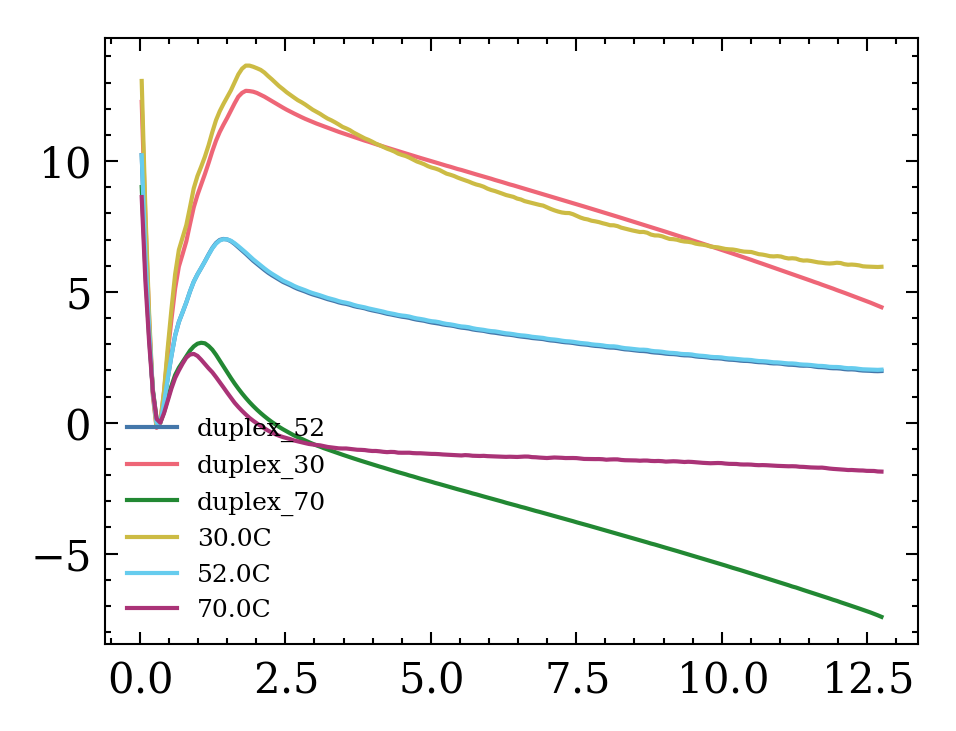

In [65]:
xmin = 0
xmax = 15
calculated_bin_centers, bin_edges = us_list[0].get_bins(xmin, xmax, n_bins=200)
temp = [us_list_ground_truth[1], us_list_ground_truth[-1]]
with plt.style.context(['science', 'no-latex', 'bright']): 

    fig, ax = plt.subplots(dpi=300)
    
    us_list[0].wham.plot_free_energy(ax=ax, label='duplex_52')
    
    for us in temp:
        us.free['Free'] -= us.free['Free'][5]
        us.wham.plot_free_energy(ax=ax)
        

    for f, temp_val in zip(free_kinetic_bias_new_w_beta, temp_range):
        plt.plot(calculated_bin_centers*0.8518, f - f[5], label=f'{temp_val:.1f}C') 
        
    plt.legend(fontsize=6)

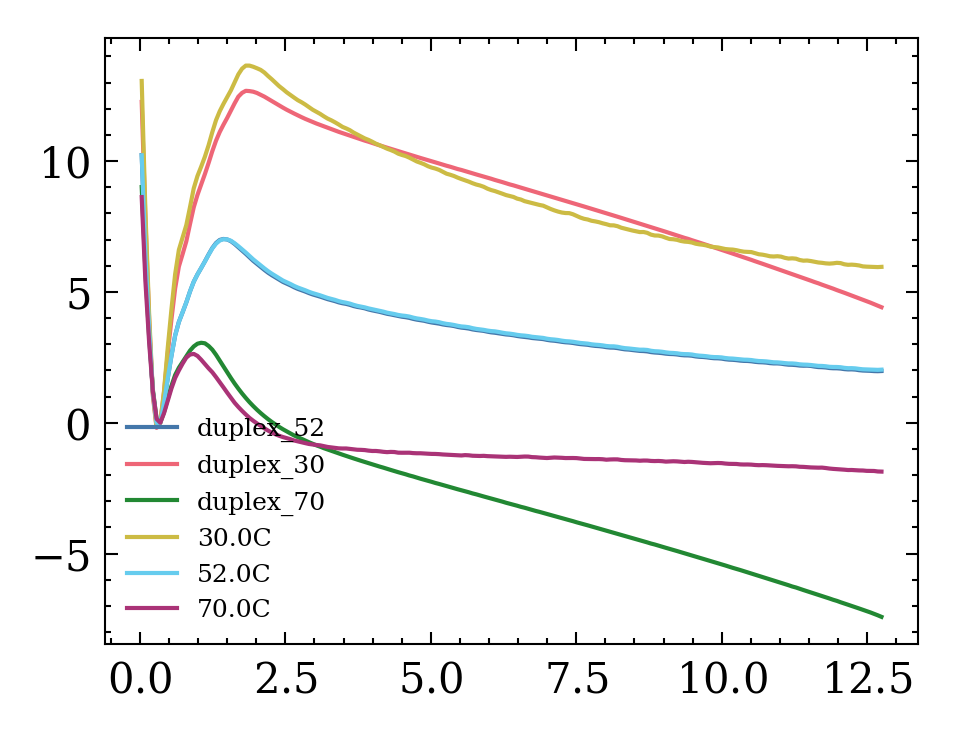

In [54]:
xmin = 0
xmax = 15
calculated_bin_centers, bin_edges = us_list[0].get_bins(xmin, xmax, n_bins=200)
temp = [us_list_ground_truth[1], us_list_ground_truth[-1]]
with plt.style.context(['science', 'no-latex', 'bright']): 

    fig, ax = plt.subplots(dpi=300)
    
    us_list[0].wham.plot_free_energy(ax=ax, label='duplex_52')
    
    for us in temp:
        us.free['Free'] -= us.free['Free'][5]
        us.wham.plot_free_energy(ax=ax)
        

    for f, temp_val in zip(free_kinetic_bias_w_beta, temp_range):
        # f = f / ((temp_val + 273.15) / 3000)
        plt.plot(calculated_bin_centers*0.8518, f - f[5], label=f'{temp_val:.1f}C') 
        
    plt.legend(fontsize=6)

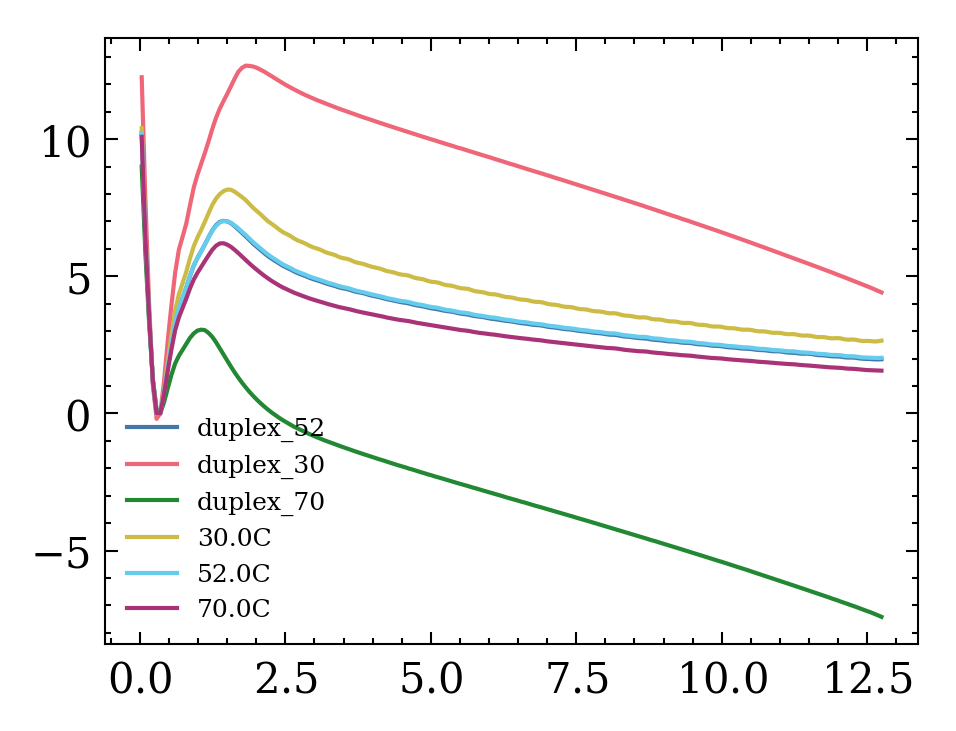

In [52]:
xmin = 0
xmax = 15
calculated_bin_centers, bin_edges = us_list[0].get_bins(xmin, xmax, n_bins=200)
temp = [us_list_ground_truth[1], us_list_ground_truth[-1]]
with plt.style.context(['science', 'no-latex', 'bright']): 

    fig, ax = plt.subplots(dpi=300)
    
    us_list[0].wham.plot_free_energy(ax=ax, label='duplex_52')
    
    for us in temp:
        us.free['Free'] -= us.free['Free'][5]
        us.wham.plot_free_energy(ax=ax)
        

    for f, temp_val in zip(free_kinetic_bias, temp_range):
        # f = f / ((temp_val + 273.15) / 3000)
        plt.plot(calculated_bin_centers*0.8518, f - f[5], label=f'{temp_val:.1f}C') 
        
    plt.legend(fontsize=6)

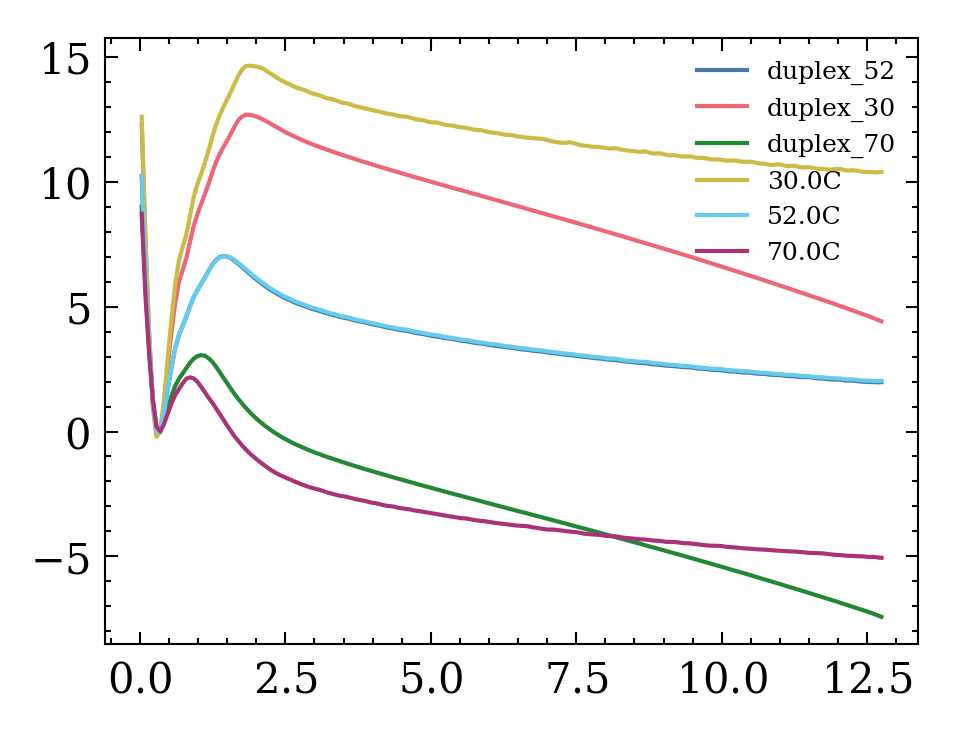

In [37]:
xmin = 0
xmax = 15
calculated_bin_centers, bin_edges = us_list[0].get_bins(xmin, xmax, n_bins=200)
temp = [us_list_ground_truth[1], us_list_ground_truth[-1]]
with plt.style.context(['science', 'no-latex', 'bright']): 

    fig, ax = plt.subplots(dpi=300)
    
    us_list[0].wham.plot_free_energy(ax=ax, label='duplex_52')
    
    for us in temp:
        us.free['Free'] -= us.free['Free'][5]
        us.wham.plot_free_energy(ax=ax)
        

    for f, temp_val in zip(free_kinetic, temp_range):
        plt.plot(calculated_bin_centers*0.8518, f - f[5], label=f'{temp_val:.1f}C') 
        
    plt.legend(fontsize=6)

In [56]:
np.array(us_list[0].umbrella_bias) /8 * 2

/tmp/ipykernel_671830/1817751096.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(us_list[0].umbrella_bias) /8 * 2


array([                0
       0        0.007439
       1        0.016140
       2        0.014307
       3        0.023016
       4        0.028569
       ...           ...
       3378682  0.066382
       3378683  0.063840
       3378684  0.075299
       3378685  0.094722
       3378686  0.080282

       [3378687 rows x 1 columns],                 0
                                   0        0.103480
                                   1        0.119684
                                   2        0.128709
                                   3        0.111197
                                   4        0.109255
                                   ...           ...
                                   3846212  0.147926
                                   3846213  0.158949
                                   3846214  0.185777
                                   3846215  0.217047
                                   3846216  0.193349

                                   [3846217 rows x 1 columns],

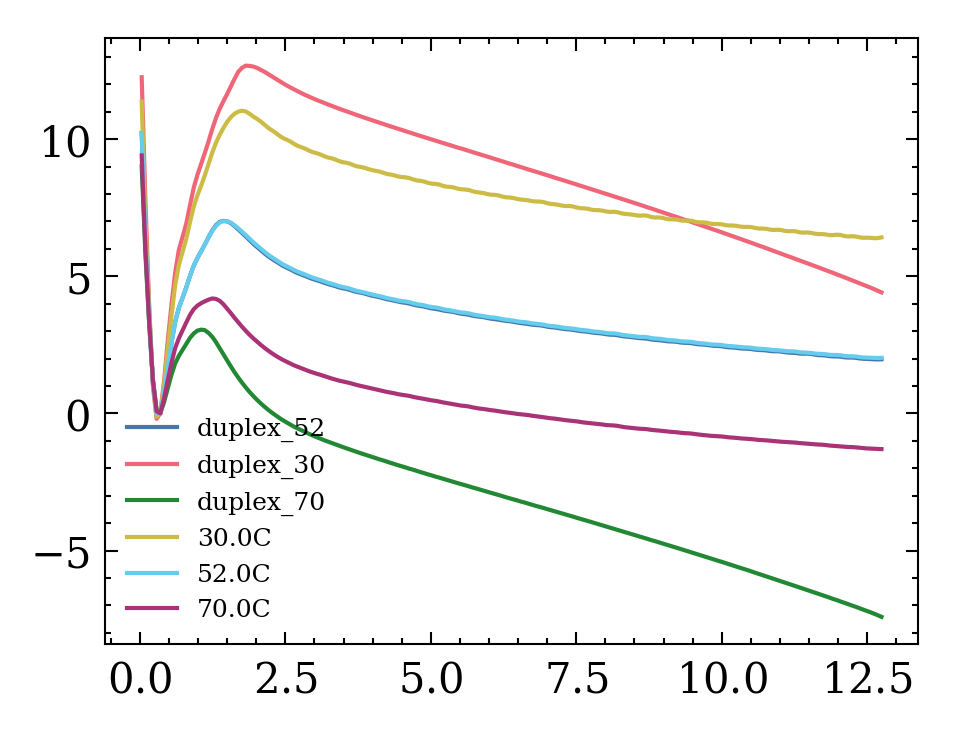

In [26]:
xmin = 0
xmax = 15
calculated_bin_centers, bin_edges = us_list[0].get_bins(xmin, xmax, n_bins=200)
temp = [us_list_ground_truth[1], us_list_ground_truth[-1]]
with plt.style.context(['science', 'no-latex', 'bright']): 

    fig, ax = plt.subplots(dpi=300)
    
    us_list[0].wham.plot_free_energy(ax=ax, label='duplex_52')
    
    for us in temp:
        us.free['Free'] -= us.free['Free'][5]
        us.wham.plot_free_energy(ax=ax)
        

    for f, temp_val in zip(free, temp_range):
        plt.plot(calculated_bin_centers*0.8518, f - f[5], label=f'{temp_val:.1f}C') 
        
    plt.legend(fontsize=6)

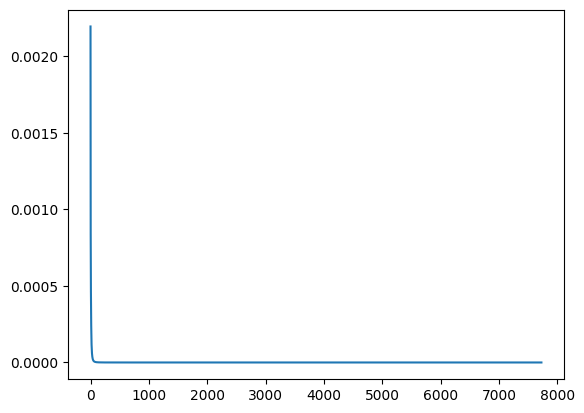

In [12]:
plt.plot(range(len(f_i_temps_over_time)) ,np.array(f_i_temps_over_time))

In [36]:
path = os.path.abspath('/scratch/matthew/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/')

system_name = 'multi_system_runs'

systems = ['duplex_25', 'duplex_30', 'duplex_35', 'duplex_40', 'duplex_45', 'duplex_50', 'duplex_55', 'duplex_60', 'duplex_65', 'duplex_70']
temperature_list = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

file_dirs = [f'{path}/{system_name}' for _ in range(len(systems))]


com_list = '8,9,10,11,12,13,14,15'
ref_list = '0,1,2,3,4,5,6,7'
xmin = 0
xmax = 15
n_windows = 100

stiff = 0.4

equlibration_parameters_list = [{'backend':'CPU','steps':'5e7','print_energy_every': '4e7',
                           'print_conf_interval':'4e7', "CUDA_list": "no",
                           'use_edge': 'false', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                           'T':f'{temp}C'} for temp in temperature_list]

production_parameters_list = [{'backend':'CPU','steps':'1e9','print_energy_every': '1e8',
                        'print_conf_interval':'1e8', "CUDA_list": "no",
                        'use_edge': 'false', 'refresh_vel': '1',
                        'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                        'T':f'{temp}C'} for temp in temperature_list]

us_list_ground_truth = [MeltingUmbrellaSampling(file_dir, sys, clean_build='force') for file_dir, sys in zip(file_dirs,systems)]

simulation_manager = SimulationManager()

/home/matthew/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/matthew/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/matthew/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/matthew/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/matthew/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning

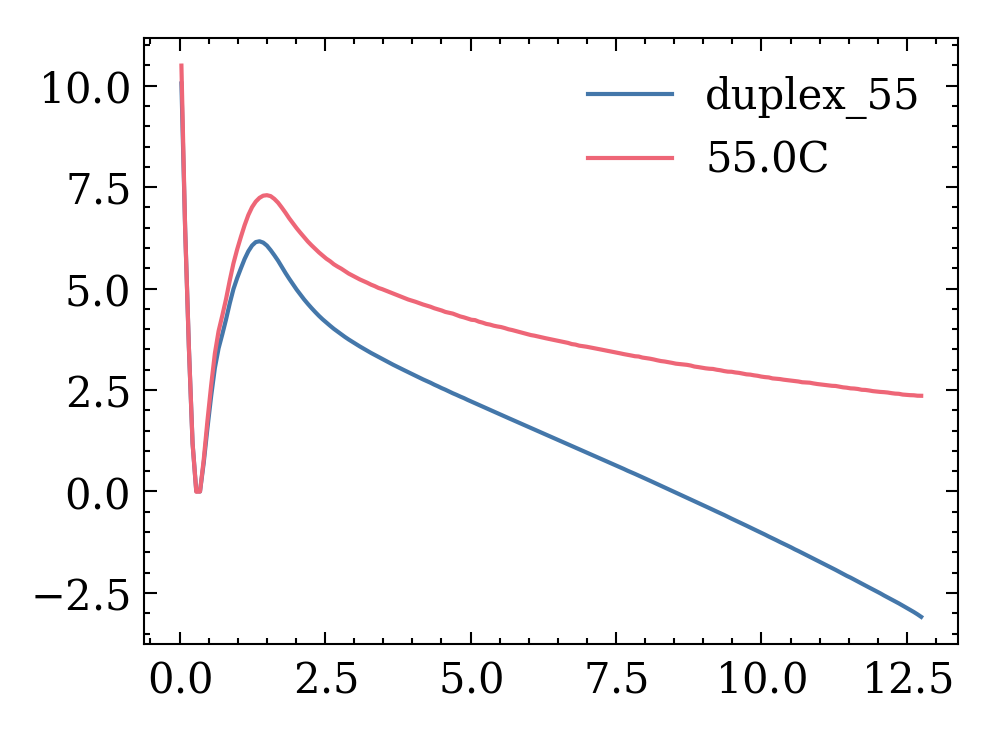

In [112]:
with plt.style.context(['science', 'no-latex', 'bright']): 

    fig, ax = plt.subplots(dpi=300)
    for us in us_list_ground_truth[6:7]:
        us.free['Free'] -= us.free['Free'][5]
        us.wham.plot_free_energy(ax=ax)

    for f, temp_val in zip(free[5:6], temp_range[6:7]):
        plt.plot(calculated_bin_centers*0.8518, f - f[5], label=f'{temp_val:.1f}C') 
        
    plt.legend()

In [18]:
bins = np.linspace(us_list[0].wham.xmin, us_list[0].wham.xmax, 200)
real_bins = np.zeros(len(bins))
for i in range(len(bins)):
    real_bins[i] = us_list[0].wham.xmin + (bins[1] - bins[0])* (i +0.5)

In [27]:
n_bins = 200
BIN_WIDTH = (us_list[0].wham.xmax - us_list[0].wham.xmin) / n_bins;
BIN_WIDTH

0.07375

In [5]:
def potential(bins, r0_value, k):
    return 0.5 * k * (bins - r0_value)**2

beta = 1 / temperature
p
bins = np.linspace(0.037500, 14.962500, 200)
r0 = np.linspace(0, 15, 61)[1:]
window_potentials = np.array([potential(bins, r0_val, 5) for r0_val in r0])
com_values = np.array(list(us_list[0].com_by_window.values())).squeeze(-1)
p_x = us_list[0].free['Prob'].values

p_x_u = p_x * np.exp(-window_potentials * beta)

f_i_manual = -temperature * np.log(np.sum(p_x_u, axis=1))
f_i_manual -= f_i_manual[0]
f_i_manual

# def compute_f_i():
    

array([ 0.        , -0.0168389 ,  0.16493677,  0.38605896,  0.52956113,
        0.6171747 ,  0.64042031,  0.61503313,  0.57145131,  0.53060045,
        0.4965947 ,  0.46909656,  0.44668079,  0.42753959,  0.41129174,
        0.39694717,  0.38405366,  0.3715228 ,  0.35981619,  0.34889027,
        0.3383613 ,  0.32853274,  0.31867939,  0.30959601,  0.30088698,
        0.29313576,  0.284944  ,  0.27665898,  0.2693992 ,  0.262569  ,
        0.25578454,  0.24883236,  0.24269206,  0.23669293,  0.23052175,
        0.22436974,  0.2186516 ,  0.21291017,  0.20701053,  0.20172042,
        0.19693681,  0.19155464,  0.18694841,  0.18221173,  0.17776562,
        0.17292105,  0.16797269,  0.1632727 ,  0.15904606,  0.15493558,
        0.15098187,  0.14680656,  0.14290535,  0.13866485,  0.13460108,
        0.13051631,  0.12686374,  0.12317039,  0.12483461,  0.19373332])

In [ ]:
temp_range_scaled = (temp_range + 273.15) / 3000
temperature = np.array(us_list[0].temperature, dtype=np.longdouble)
beta = 1 / temperature
beta_range = 1 / temp_range_scaled

f_i = us_list[0].get_biases()
weight = -beta * np.array(f_i)
weight_norm = logsumexp(weight)
A_i = weight - weight_norm

weight_temps = -beta_range[:, np.newaxis] * np.array(f_i)
weight_temps_norm = logsumexp(weight_temps, axis=1)
A_i_temps = weight_temps - weight_temps_norm[:, np.newaxis]

log_p_i_h = us_list[0].log_p_i_h

a_log_p_i_h = log_p_i_h.T + A_i_temps[:, :]



combine_log_p_i_h = logsumexp(a_log_p_i_h, axis=2)

free_energy = -combine_log_p_i_h.T
free_energy -= free_energy.min(axis=1, keepdims=True)
free_energy[:,0] = free_energy[:,0] - us_list[0].volume_correction
free_energy_discrete = free_energy + us_list[0].volume_correction
normed_free_energy = -free_energy - logsumexp(-free_energy, axis=1, keepdims=True)
prob_discrete = np.exp(normed_free_energy)
prob_discrete

In [18]:
for free in us_list[0].prob_discrete:
    print(free[0])

0.82488363146790063385
0.8246177139339792543
0.82444480381923051897


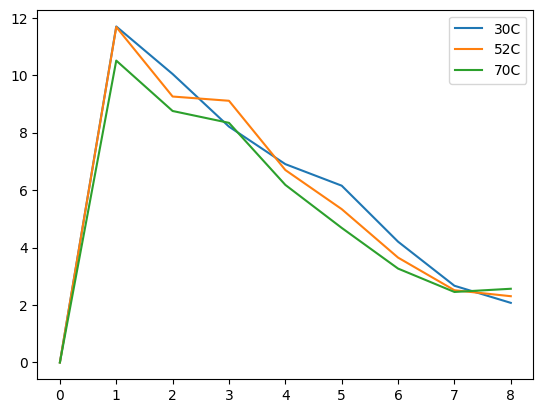

In [29]:
for idx, free in enumerate(us_list[0].free_energy_discrete):
    plt.plot(range(9), free, label=f'{temp_range[idx]}C')
plt.legend()

In [ ]:
plt.plot(range(9), vmmc_replica_generator.sim_list[0].statistics['wt_occ_34.0C_free'] - vmmc_replica_generator.sim_list[0].statistics['wt_occ_34.0C_free'][0])

plt.plot(range(9), vmmc_replica_generator.sim_list[0].statistics['wt_occ_70.0C_free']- vmmc_replica_generator.sim_list[0].statistics['wt_occ_70.0C_free'][0])

plt.plot(range(9), vmmc_replica_generator.sim_list[0].statistics['wt_occ_34.0C_free'])

plt.plot(range(9), vmmc_replica_generator.sim_list[0].statistics['wt_occ_34.0C_free'])

In [ ]:
wham_dir = os.path.abspath('/scratch/mlsample/ipy_oxDNA/wham/wham')
n_bins = '200'
tol = '1e-12'
n_boot = '0'
for us in us_list:
    us.wham_run(wham_dir, xmin, xmax, 10, n_bins, tol, n_boot)

In [52]:
max_hb = 8
us_list[0].continuous_to_discrete_unbiasing(max_hb)
# us_list[1].continuous_to_discrete_unbiasing(max_hb)

In [54]:
us_list[0].volume_correction

0.5081541600408179549

In [ ]:
fig, ax = plt.subplots(dpi=300)

# ax.plot(range(9), us_list[1].free_energy_discrete, label='us_1')

ax.plot(range(9), us_list[0].free_energy_discrete, label='us_0')
ax.plot(range(9), vmmc_replica_generator.wt_free_mean, label='vmmc')
plt.legend()

In [40]:
path = os.path.abspath('/scratch/matthew/ipy_oxDNA/ipy_oxdna_examples/duplex_melting/')

system_name = 'multi_system_runs'

systems = ['duplex_25', 'duplex_30', 'duplex_35', 'duplex_40', 'duplex_45', 'duplex_50', 'duplex_55', 'duplex_60', 'duplex_65', 'duplex_70']
temperature_list = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

file_dirs = [f'{path}/{system_name}' for _ in range(len(systems))]


com_list = '8,9,10,11,12,13,14,15'
ref_list = '0,1,2,3,4,5,6,7'
xmin = 0
xmax = 15
n_windows = 100

stiff = 0.4

equlibration_parameters_list = [{'backend':'CPU','steps':'5e7','print_energy_every': '4e7',
                           'print_conf_interval':'4e7', "CUDA_list": "no",
                           'use_edge': 'false', 'refresh_vel': '1',
                           'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                           'T':f'{temp}C'} for temp in temperature_list]

production_parameters_list = [{'backend':'CPU','steps':'1e9','print_energy_every': '1e8',
                        'print_conf_interval':'1e8', "CUDA_list": "no",
                        'use_edge': 'false', 'refresh_vel': '1',
                        'fix_diffusion': '0', 'fix_diffusion_every': '1000',
                        'T':f'{temp}C'} for temp in temperature_list]

us_list = [MeltingUmbrellaSampling(file_dir, sys, clean_build='force') for file_dir, sys in zip(file_dirs,systems)]

simulation_manager = SimulationManager()

/home/matthew/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/matthew/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/matthew/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/matthew/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/matthew/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning

In [ ]:
wham_dir = os.path.abspath('/scratch/mlsample/ipy_oxDNA/wham/wham')
n_bins = '200'
tol = '1e-12'
n_boot = '0'

xmin = 0
xmax = 15
n_windows = 100
stiff = 0.4
for us in us_list:
    us.spawn_wham_run(wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot, join=False)

In [ ]:
for us in us_list:
    us.free['Free'] -= us.free['Free'][4] 

In [ ]:
fig, ax = plt.subplots(dpi=300)

for us in us_list:
    us.wham.plot_free_energy(ax=ax, label=us.system)

In [ ]:
max_hb = 8
for us in us_list:
    us.continuous_to_discrete_unbiasing(max_hb)

In [ ]:
bound = []
for us in us_list:
    bound.append((us.prob_discrete[0]))

bound

In [ ]:
def sigmoid(self, x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

temps = np.linspace(25,70,10)
p0 = [max(bound), np.median(temps), 1, min(bound), 1]  # initial guesses for L, x0, k, b
popt, _ = curve_fit(sigmoid, temps, bound, p0, method='dogbox')
# Generate fitted data
x_fit = np.linspace(min(temps), max(temps), 500)
y_fit = sigmoid(x_fit, *popt)


idx = np.argmin(np.abs(y_fit - 0.5))
Tm = x_fit[idx]

y_fit

In [ ]:
y_fit

In [ ]:
plt.plot(x_fit, y_fit, label='fit')

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(temps, self.inverted_finfs, marker='o', label=f'{label}Data')
plt.plot(self.x_fit, self.y_fit, linestyle='--', linewidth=2, label=f'{label}Sigmoid Fit')

# Add a vertical line at the melting temperature
plt.axvline(x=self.sim.Tm, color='r', linestyle='--', linewidth=2, label=f'{label}Tm = {self.sim.Tm:.2f} °C')

plt.xlabel('Temperature (°C)')
plt.ylabel('Fraction of ssDNA')
plt.title(f'Melting Profile')

# Set y-axis limits
plt.ylim(0, 1.1)

plt.legend()
plt.grid(True)

In [ ]:
for us in us_list[:-3]:
    plt.plot(range(9), us.free_energy_discrete, label=us.system)
plt.legend()

In [ ]:
for us in us_list:
    us.calculate_melting_temperature()

In [ ]:
for us in us_list:
    print(us.inverted_finf)

In [ ]:
temps = np.linspace(25,70,10)
vmmc_replica_generator.sim_list[0].analysis.plot_melting_profiles()
plt.plot(temps,bound)

In [ ]:
for us in us_list:
    us.calculate_melting_temperature_using_vmmc()

In [ ]:
inverted_finfs = []
temperatures = []
for us in us_list:
    inverted_finfs.append(1 - us.vmmc_sim.analysis.finfs[0])
    temperatures.append(float((us.system.split('_')[-1])))
# del inverted_finfs[2]
# del temperatures[2]
inverted_finfs

In [ ]:
def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

from scipy.optimize import curve_fit

p0 = [max(inverted_finfs), np.median(temperatures), 1, min(inverted_finfs)]  # initial guesses for L, x0, k, b
popt, _ = curve_fit(sigmoid, temperatures, inverted_finfs, p0, method='dogbox')

x_fit = np.linspace(min(temperatures), max(temperatures), 500)
y_fit = sigmoid(x_fit, *popt)

idx = np.argmin(np.abs(y_fit - 0.5))
Tm = x_fit[idx]

In [ ]:
# Plotting
# plt.figure(figsize=(10, 6))
vmmc_sim_list[0].analysis.plot_melting_profiles(label='VMMC Discrete ')

plt.scatter(temperatures, inverted_finfs, marker='o', label='Continous umbrella made discrete data')
plt.plot(x_fit, y_fit, linestyle='--', linewidth=2, label='Continous umbrella made discrete Sigmoid Fit')

# Add a vertical line at the melting temperature
plt.axvline(x=Tm, color='green', linestyle='--', linewidth=2, label=f'Continous umbrella made discrete Tm = {Tm:.2f} °C')

plt.xlabel('Temperature (°C)')
plt.ylabel('Fraction of ssDNA')
plt.title(f'Melting Profile')

# Set y-axis limits
plt.ylim(0, 1.1)

plt.legend()
plt.grid(True)
plt.show()


In [ ]:
us_list[0].get_com_distance_by_window()
us_list[0].get_bias_potential_value(us_list[0].wham.xmin, us_list[0].wham.xmax, us_list[0].n_windows, us_list[0].wham.umbrella_stiff)
us_list[0].get_r0_values()

if us_list[0].potential_energy_by_window is None:
    us_list[0].read_potential_energy()

In [ ]:
def w_i(r, r0, stiff):
    return 0.5 * float(stiff) * (r - r0)**2

def get_bins(xmin, xmax, n_bins=200):
    # Calculate the bin width
    bin_width = (xmax - xmin) / n_bins

    # Calculate the first bin center
    first_bin_center = xmin + bin_width / 2

    # Generate the bin centers
    calculated_bin_centers = np.array([first_bin_center + i * bin_width for i in range(n_bins)])

    # Calculate bin edges based on bin centers
    bin_edges = np.zeros(len(calculated_bin_centers) + 1)
    bin_edges[1:-1] = (calculated_bin_centers[:-1] + calculated_bin_centers[1:]) / 2.0
    bin_edges[0] = calculated_bin_centers[0] - (bin_edges[1] - calculated_bin_centers[0])
    bin_edges[-1] = calculated_bin_centers[-1] + (calculated_bin_centers[-1] - bin_edges[-2])

    return calculated_bin_centers, bin_edges

def celcius_to_scaled(temp):
    return (temp + 273.15) / 3000

def weighted_histogram_analysis_method_temperature_interpolation(temp_range):
    #Get temperature scalar
    temp_range_scaled = celcius_to_scaled(temp_range)
    beta_range = 1 / temp_range_scaled

    temperature = np.array(us_list[0].temperature, dtype=np.longdouble)
    beta = 1 / temperature
    
    umbrella_bias = np.array(us_list[0].umbrella_bias).squeeze(-1)
    new_energy_per_window = us_list[0]._new_calcualte_bias_energy(umbrella_bias, temp_range)
    temp_biases = np.exp(np.array(new_energy_per_window).swapaxes(0,1) * beta_range[:,np.newaxis, np.newaxis])
    #Get the energy bias per window per temperature
    # energy_bias_per_window_per_temperature = np.array(us_list[0]._calculate_energy_bias(temp_range))
    # temp_biases = np.exp(beta_range[:,np.newaxis, np.newaxis] * energy_bias_per_window_per_temperature.swapaxes(0,1) + umbrella_bias_per_temp)
    #Intalise the inital free energy shift
    # F_i_temps = np.array([[np.random.randint(10) for F in us_list[0].get_biases()] for _ in temp_range_scaled])

    #get the bin values
    xmin = 0
    xmax = 15
    calculated_bin_centers, bin_edges = get_bins(xmin, xmax, n_bins=200)

    #Calculate the biases in the windows
    window_biases = np.array([[
        w_i(bin_value, r0_value, us_list[0].wham.umbrella_stiff)
        for bin_value in calculated_bin_centers
        ] 
        for r0_value in us_list[0].r0
    ], dtype=np.longdouble)

    #Get the com values
    all_com_values = np.array(list(us_list[0].com_by_window.values())).squeeze(-1)

    #Calculate the counts of each bin
    count = [
        [
        np.histogram(com_values, bins=bin_edges, weights=t_bias)[0]
        for com_values, t_bias in zip(all_com_values, temp_bias)
        ] 
        for temp_bias in temp_biases
    ]

    #Put the counts into an array
    p_i_b_s = np.array(count)

    #The numerator of p_x is the sum of the counts from each window
    numerator = np.sum(p_i_b_s, axis=1)
    
    rng = np.random.default_rng()    
    epsilon = 1e-12
    
    f_i_temps_old = np.array([[rng.normal(loc=0.0, scale=1.0, size=None) for F in us_list[0].get_biases()] for _ in temp_range_scaled])
    f_i_temps_new = np.zeros_like(f_i_temps_old)
    f_i_temps_over_time = []
    
    first = True
    while (first is True) or (np.max((f_i_temps_new - f_i_temps_old)**2) > epsilon):
        first = False
        f_i_temps_old = deepcopy(f_i_temps_new)
        
        #Compute the denominator
        denominator = np.array([
            [
            sum(counts) * np.exp((F - w) * bet)

            for counts, F, w, t_bias in zip(p_i_b, F_i, window_biases, temp_b)
            ] 
            for bet, F_i, temp_b, p_i_b in zip(beta_range, f_i_temps_old, temp_biases, p_i_b_s)
        ])

        #Compute the probability of each bin
        p_x = numerator / np.sum(denominator, axis=1)

        #Recompute the f_i values per window. This value will update till convergence
        f_i_bias_factor = np.array([np.exp(-window_biases * bet) for bet in beta_range])
        sum_p_bf = np.sum([p_ * f_ for p_, f_ in zip(p_x, f_i_bias_factor)], axis=2)
        
        f_i_temps_new = -temp_range_scaled[:,np.newaxis] * np.log(sum_p_bf)
    
        f_i_temps_over_time.append((np.max((f_i_temps_new - f_i_temps_old)**2)))
        
    value = f_i_temps_new[:,0]
    F_i_temps = f_i_temps_new - value[:,np.newaxis]

    #Get free energy
    free = -np.log(p_x)
    free = free - np.min(free, axis=1, keepdims=True)
    
    return free, F_i_temps, f_i_temps_over_time
 
temp_range = np.arange(40,46,5)    
free, F_i_temps, f_i_temps_over_time = weighted_histogram_analysis_method_temperature_interpolation(temp_range)